# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [23]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [24]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [25]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [26]:
df_train.shape

(15223, 52)

In [27]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [28]:
df_test.shape

(14910, 52)

In [29]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [30]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [60]:
df = df_test.append(df_train).reset_index(drop=True)

In [32]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 43 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
PERSONAL_INCOME               30133 non-null object
REG_FACT_FL                   30133 non-null int64
FACT_POST_FL                  30133 non-null int64
REG_POST_FL                   30133 non-null int64
REG_FACT_POST_FL              30133 non-null int64
REG_FACT_POST_TP_FL           30133 non-null int64
FL_PRESENCE_FL      

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [51]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Неполное среднее', 'Среднее специальное', 'Высшее', 'Два и более высших образования', 'Ученая степень', 'Среднее', 'Неоконченное высшее'}


MARITAL_STATUS
{'Вдовец/Вдова', 'Гражданский брак', 'Не состоял в браке', 'Разведен(а)', 'Состою в браке'}


GEN_INDUSTRY
{nan, 'Коммунальное хоз-во/Дорожные службы', 'Развлечения/Искусство', 'Энергетика', 'Маркетинг', 'Строительство', 'Другие сферы', 'ЧОП/Детективная д-ть', 'Ресторанный бизнес/Общественное питание', 'Управляющая компания', 'Образование', 'Нефтегазовая промышленность', 'Наука', 'Государственная служба', 'Информационные технологии', 'Химия/Парфюмерия/Фармацевтика', 'Логистика', 'СМИ/Реклама/PR-агенства', 'Страхование', 'Торговля', 'Салоны красоты и здоровья', 'Сборочные производства', 'Здравоохранение', 'Подбор персонала', 'Транспорт', 'Металлургия/Промышленность/Машиностроение', 'Недвижимость', 'Сельское хозяйство', 'Банк/Финансы', 'Информационные услуги', 'Туризм', 'Юридические услуги/нотариальные услуги'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [13]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [15]:
# Сначала смотрим на значения данных в которых содержатся пустые строки
for i in df.columns: # перебираем все столбцы
    if df[i].count() < df.shape[0]: # если есть пустые строки (возможно для этого есть нужный метод)
        print('='*10)
        print(i) # выводим название столбца
        print('nulls: ', df.shape[0] - df[i].count()) # выводим количество пустых элементов
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

GEN_INDUSTRY
nulls:  2713
{nan, 'СМИ/Реклама/PR-агенства', 'Ресторанный бизнес/Общественное питание', 'Логистика', 'Коммунальное хоз-во/Дорожные службы', 'Сельское хозяйство', 'Химия/Парфюмерия/Фармацевтика', 'Строительство', 'Управляющая компания', 'Туризм', 'Образование', 'Недвижимость', 'Маркетинг', 'Государственная служба', 'Наука', 'Подбор персонала', 'Другие сферы', 'Развлечения/Искусство', 'Металлургия/Промышленность/Машиностроение', 'Юридические услуги/нотариальные услуги', 'Салоны красоты и здоровья', 'ЧОП/Детективная д-ть', 'Страхование', 'Энергетика', 'Нефтегазовая промышленность', 'Здравоохранение', 'Банк/Финансы', 'Транспорт', 'Сборочные производства', 'Информационные услуги', 'Торговля', 'Информационные технологии'}


GEN_TITLE
nulls:  2713
{nan, 'Партнер', 'Рабочий', 'Руководитель низшего звена', 'Другое', 'Военнослужащий по контракту', 'Работник сферы услуг', 'Специалист', 'Высококвалифиц. специалист', 'Индивидуальный предприниматель', 'Руководитель среднего звена', 'Сл

{nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 2.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

In [112]:
# Те столбцы, которые содержат большое количество различной строковой информации удаляю, т.к. с ними еще не умею работать
df = df.drop(['GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_STATE', 'JOB_DIR', 'TP_PROVINCE', 'ORG_TP_FCAPITAL'], axis=1)

# Если количество null значений небольшое то логичнее удалить эти строки
df = df[~df['REGION_NM'].isnull()]

# Для столбца PREVIOUS_CARD_NUM_UTILIZED решил заменить null на 0 т.к. в нем хранятся количество утилизированных карт, 
# поэтому логично что null предполагает 0
df.loc[df['PREVIOUS_CARD_NUM_UTILIZED'].isnull(), 'PREVIOUS_CARD_NUM_UTILIZED'] = 0

# Если столбец содержит целочисленные значения, то данные можно заполнить средним знаечением или медианой
df.loc[df['WORK_TIME'].isnull(), 'WORK_TIME'] = df['WORK_TIME'].median()

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [ ]:
К категориальным признакам можно отнести такие данные как: Образование, Семейное положение, Должность и тд.
Для того, чтобы привести эти данные к цифровому формату, можно приметнить  

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [82]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    # Удаляем идентификатор
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    
    # Переводим стринги ту флоат
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].str.replace(',', '.').astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].str.replace(',', '.').astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].str.replace(',', '.').astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].str.replace(',', '.').astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].str.replace(',', '.').astype('float')
    
    # Удаляем пропуски
    # Те столбцы, которые содержат большое количество различной строковой информации удаляю, т.к. с ними еще не умею работать
    df_output = df_output.drop(['GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_STATE', 'JOB_DIR', 'TP_PROVINCE', 'ORG_TP_FCAPITAL'], axis=1)
    # Если количество null значений небольшое то логичнее удалить эти строки
    df_output = df_output[~df_output['REGION_NM'].isnull()]
    # Для столбца PREVIOUS_CARD_NUM_UTILIZED решил заменить null на 0, судя по логике null предполагает 0
    df_output.loc[df_output['PREVIOUS_CARD_NUM_UTILIZED'].isnull(), 'PREVIOUS_CARD_NUM_UTILIZED'] = 0
    # Если столбец содержит целочисленные значения, то данные можно заполнить средним знаечением или медианой
    df_output.loc[df_output['WORK_TIME'].isnull(), 'WORK_TIME'] = df_output['WORK_TIME'].median()
    
    # Кодируем некоторые категориальные признаки
    df_output = pd.get_dummies(df_output, columns=['EDUCATION','MARITAL_STATUS','FAMILY_INCOME','REGION_NM'])
      
    # Удаляем все оставшиеся строкове столбцы
    df_output = df_output.drop(['REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE'], axis=1)

    return df_output

In [101]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [108]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

y = df_train_preproc['TARGET']
X = df_train_preproc.drop(['TARGET'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Задание 5. Обучение и оценка качества разных моделей

In [177]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train, y_train)
predict_DTC = model_DTC.predict(X_test)
predict_proba_DTC = model_DTC.predict_proba(X_test)

model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, y_train)
predict_RFC = model_RFC.predict(X_test)
predict_proba_RFC = model_RFC.predict_proba(X_test)

model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
predict_LR = model_LR.predict(X_test)
predict_proba_LR = model_LR.predict_proba(X_test)

In [178]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

print('DecisionTreeClassifier')
print('precision', precision_score(y_test, predict_DTC))
print('recall', recall_score(y_test, predict_DTC))
print('accuracy', accuracy_score(y_test, predict_DTC))

print('\nRandomForestClassifier')
print('precision', precision_score(y_test, predict_RFC))
print('recall', recall_score(y_test, predict_RFC))
print('accuracy', accuracy_score(y_test, predict_RFC))

print('\nLogisticRegression')
print('precision', precision_score(y_test, predict_LR))
print('recall', recall_score(y_test, predict_LR))
print('accuracy', accuracy_score(y_test, predict_LR))


DecisionTreeClassifier
precision 0.18449612403100776
recall 0.20588235294117646
accuracy 0.7843223122399825

RandomForestClassifier
precision 0.22727272727272727
recall 0.00865051903114187
accuracy 0.8708123494635428

LogisticRegression
precision 1.0
recall 0.0017301038062283738
accuracy 0.8736588570177359


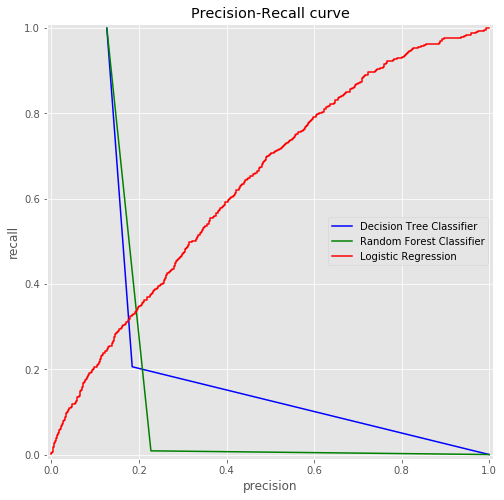

In [185]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(8, 8))
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid(True)
plt.title('Precision-Recall curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

precision_DTC, recall_DTC, _ = precision_recall_curve(y_test, predict_DTC)
lineDTC = plt.plot(precision_DTC, recall_DTC, 'b-', label='Decision Tree Classifier')

precision_RFC, recall_RFC, _ = precision_recall_curve(y_test, predict_RFC)
plt.plot(precision_RFC, recall_RFC, 'g-', label='Random Forest Classifier')

precision_LR, recall_LR, _ = precision_recall_curve(y_test, predict_LR)
plt.plot(fprLR, tprLR, 'r-', label='Logistic Regression')

plt.legend()

ROC_AUC
Decision Tree Classifier	 0.5365208475556916
Random Forest Classifier	 0.5944042917330618
LogisticRegression		 0.6399015979063533


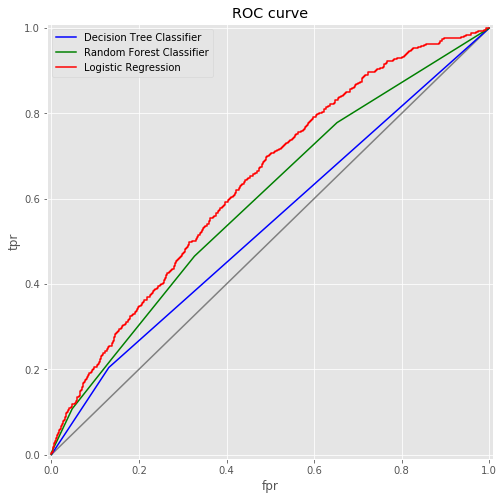

In [184]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'grey')
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

fprDTC, tprDTC, thresholds = roc_curve(y_test, predict_probaDTC[:,1])
lineDTC = plt.plot(fprDTC, tprDTC, 'b-' ,label='Decision Tree Classifier')

fprRFC, tprRFC, thresholds = roc_curve(y_test, predict_probaRFC[:,1])
plt.plot(fprRFC, tprRFC, 'g-', label='Random Forest Classifier')

fprLR, tprLR, thresholds = roc_curve(y_test, predict_probaLR[:,1])
plt.plot(fprLR, tprLR, 'r-', label='Logistic Regression')

plt.legend()

roc_auc_DTC = roc_auc_score(y_test, predict_probaDTC[:,1])
roc_auc_RFC = roc_auc_score(y_test, predict_probaRFC[:,1])
roc_auc_LR = roc_auc_score(y_test, predict_probaLR[:,1])

print('ROC_AUC')
print('Decision Tree Classifier\t', roc_auc_DTC)
print('Random Forest Classifier\t', roc_auc_RFC)
print('LogisticRegression\t\t', roc_auc_LR)

In [189]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

cvs_DTC = cross_val_score(
    DecisionTreeClassifier(),
    X,
    y,
    scoring='roc_auc',
    cv=10
)

cvs_RFC = cross_val_score(
    RandomForestClassifier(),
    X,
    y,
    scoring='roc_auc',
    cv=10
)

cvs_LR = cross_val_score(
    LogisticRegression(),
    X,
    y,
    scoring='roc_auc',
    cv=10
)

print('AVG_ROC_AUC')
print('Decision Tree Classifier\t', sum(cvs_DTC)/len(cvs_DTC))
print('Random Forest Classifier\t', sum(cvs_RFC)/len(cvs_RFC))
print('Logistic Regression\t\t', sum(cvs_LR)/len(cvs_LR))

AVG_ROC_AUC
Decision Tree Classifier	 0.522249493166101
Random Forest Classifier	 0.6037387474815634
Logistic Regression		 0.6406808934655721


In [208]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки
df_test_preproc_target = df_test_preproc['TARGET']
df_test_preproc = df_test_preproc.drop(['TARGET'], axis=1)

predict = model_LR.predict_proba(df_test_preproc)

ROC_AUC
LogisticRegression		 0.6196251994832435


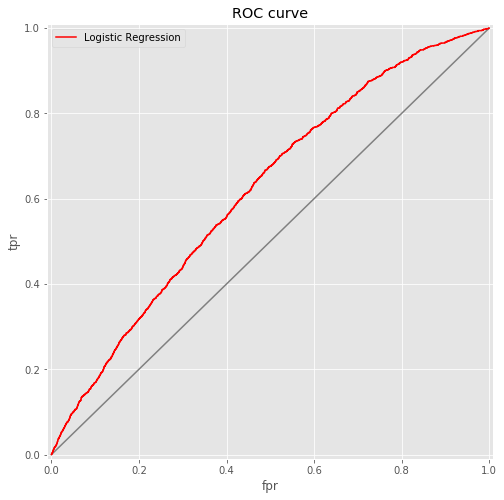

In [209]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'grey')
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

fprLR, tprLR, thresholds = roc_curve(df_test_preproc_target, predict[:,1])
plt.plot(fprLR, tprLR, 'r-', label='Logistic Regression')

plt.legend()

roc_auc_score = roc_auc_score(df_test_preproc_target, predict[:,1])

print('ROC_AUC')
print('LogisticRegression\t\t', roc_auc_score)

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [1]:
### И далее ;)